In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

from imblearn.combine import SMOTETomek
from collections import Counter


In [107]:
df = pd.read_csv("uci_malware_detection.csv")
df.head(n=5)

,Label,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_522,F_523,F_524,F_525,F_526,F_527,F_528,F_529,F_530,F_531
0,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [108]:
print(df.shape)
print(df['Label'].value_counts())

(373, 532)
Label
malicious        301
non-malicious     72
Name: count, dtype: int64


Text(0, 0.5, 'Número de Observaciones')

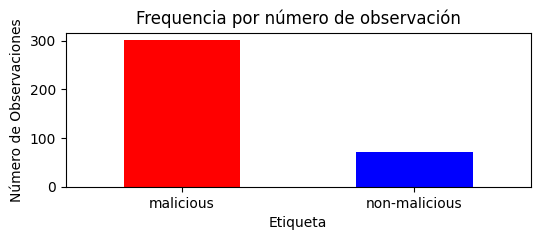

In [109]:
plt.figure(figsize=(6, 2))
count_classes = df['Label'].value_counts()
count_classes.plot(kind = 'bar', rot=0, color=['red', 'blue'])
plt.title("Frequencia por número de observación")
plt.xlabel("Etiqueta")
plt.ylabel("Número de Observaciones")

In [126]:
#Verificar si hay valores nulos
print(df.isnull().sum())

# Eliminar filas con valores nulos
malware_sin_nulos = df.dropna(axis=0)

# Verificar si se eliminaron los valores nulos
print(malware_sin_nulos.isnull().sum())

Label    0
F_1      0
F_2      0
F_3      0
F_4      0
        ..
F_527    0
F_528    0
F_529    0
F_530    0
F_531    0
Length: 532, dtype: int64
Label    0
F_1      0
F_2      0
F_3      0
F_4      0
        ..
F_527    0
F_528    0
F_529    0
F_530    0
F_531    0
Length: 532, dtype: int64


In [127]:
y = y.replace(["No_malicioso"],[0])
y = y.replace(["Malicioso"],[1])
y

0      non-malicious
1      non-malicious
2      non-malicious
3      non-malicious
4      non-malicious
           ...      
368        malicious
369        malicious
370        malicious
371        malicious
372        malicious
Name: Label, Length: 373, dtype: object

In [128]:
#Definimos etiquetas y características
y = df['Label']
X = df.drop('Label', axis=1)
#Dividimos en sets de: Entrenamiento y Testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

In [129]:
# Imprimimos la distribución de clases antes de aplicar el muestreo
print("Distribución de clases antes del muestreo:", Counter(y_train))

Distribución de clases antes del muestreo: Counter({'malicious': 60, 'non-malicious': 14})


In [112]:
# Aplicamos SMOTETomek al conjunto de entrenamiento
smotetomek = SMOTETomek()
X_train_resampled, y_train_resampled = smotetomek.fit_resample(X_train, y_train)

In [113]:
# Imprimimos la distribución de clases después del muestreo
print("Distribución de clases después del muestreo:", Counter(y_train_resampled))

Distribución de clases después del muestreo: Counter({'malicious': 60, 'non-malicious': 60})


In [114]:
# Entrenamos un Árbol de Decisión con los datos resampleados
clf = DecisionTreeClassifier()
clf.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier()

In [115]:
# Realizamos predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)
print("Distribución de clases después del muestreo:", Counter(y_pred))

Distribución de clases después del muestreo: Counter({'malicious': 245, 'non-malicious': 54})


In [116]:
# Crear matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

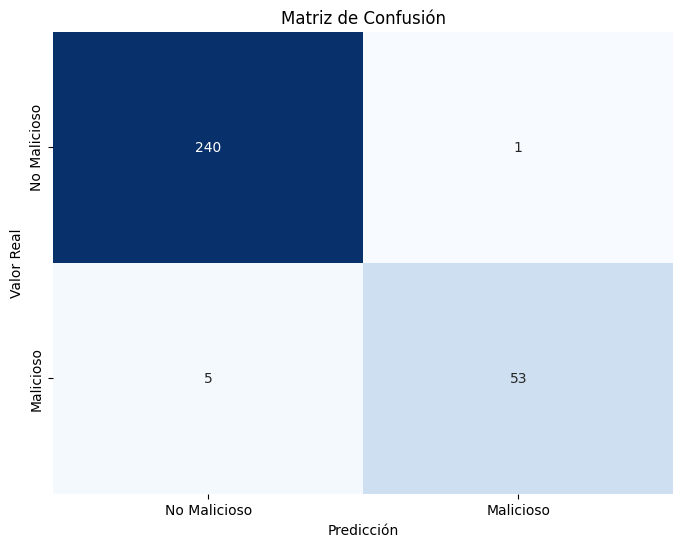

               precision    recall  f1-score   support

    malicious       0.98      1.00      0.99       241
non-malicious       0.98      0.91      0.95        58

     accuracy                           0.98       299
    macro avg       0.98      0.95      0.97       299
 weighted avg       0.98      0.98      0.98       299



In [117]:
# Mostramos métricas de evaluación
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['No Malicioso', 'Malicioso'], yticklabels=['No Malicioso', 'Malicioso'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()
print(classification_report(y_test, y_pred))